Campaign for selling personal loans.

This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

1. Read the column description and ensure you understand each attribute well
2. Study the data distribution in each attribute, share your findings. (5 points)
3. Get the target column distribution. Your comments
4. Split the data into training and test set in the ratio of 70:30 respectively
5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)
6. Print the confusion matrix for all the above models (5 points)
7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)

Dataset:Bank_Personal_Loan_Modelling-1.csvView in a new window

Column description: TheraBank_Column_Description.xlsxView in a new window

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


Q. 1. Read the column description and ensure you understand each attribute well

1. Here personal loan would be the target column
2. Id column is not an influencer in prediction

### Q. 2. Study the data distribution in each attribute, share your findings. (5 points)

In [21]:
print (df.shape)
print (df.dtypes)

(5000, 14)
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


                     count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.

C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


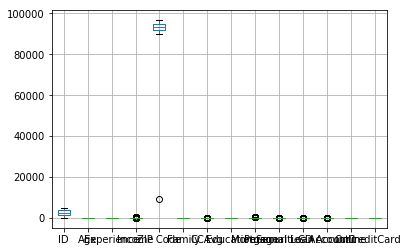

In [3]:
# Following approach is taken to study the data distribution
# Use describe function to see statistics, range of values etc. Use histogram to understand the data distribution. 
# Use pair plot to see outliers
# use xl filter functionality etc. for additional understanding

print (df.describe(include = 'all').transpose())
df.plot.box(grid='True')

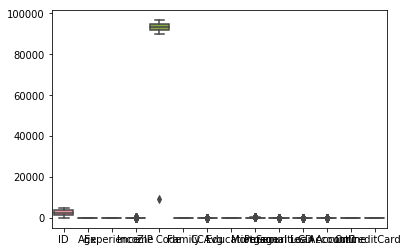

In [4]:
sns.boxplot (data = df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002221F5EFA58>,
      dtype=object)

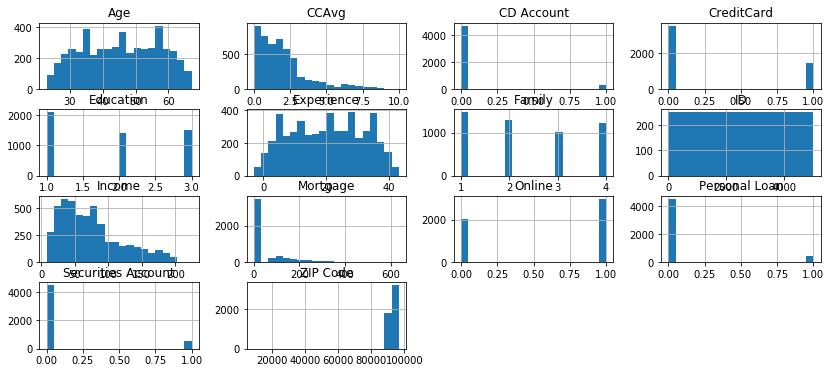

In [5]:
df.hist(figsize=[14,6], bins = 20)

### 2 Distribution Analysis:

1. Age (Customer's age in completed years) -  is fairly distributed, good range of customers from 23 yrs to 67 yrs. Young population can be targetted further for account openings in case bank wants to increase customer base
2. Experience (#years of professional experience) - fair distribution of data. Range is '-3' to '43'. Assuming negative values indicate number of years before these customers start earning. this also matches with the age of customers.
3. Income (Annual income of the customer (000)) - Its right tailed, which is normal. Most of the customers would be low earning customers. Normally low earning customers would request for personal loan
4. CC Avg (Avg. spending on credit cards per month (000)) - Avg spending on credit card is distributed towards lower values, which is natural. However, there are few who are not using credit card even though they have the credit card. Such people will not be interested in taking personal loans.
5. Zip Code (Home Address ZIP code) - Categorizal variable. correlation needs to be checked in case a particular zip code customers are more inclined for borrowing. This can also help bank understands customer reach in different locations. Could be because of good sales people, branches etc.
6. Family size (Family size of the customer) - Categorizal variable. Seems to be equally distributed among 1,2,3,4. 1 being highest (singles) - could be because of young customer base. Need to see the correlation with loan to understand behaviour of singles/couples/ couples with kids
7. Education (Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional) - Categorizal variable - max customers are of undergrad category
8. Mortgage (Value of house mortgage if any. ($000)) - Most of the custmoers don't have mortgage. not sure if it has an impact on loan
9. Securities Account (Does the customer have a securities account with the bank?) - Most of the customers don't have securities account; not sure if it has an impact on loan
10. CD Account (Does the customer have a certificate of deposit (CD) account with the bank?) - Most of the customers don't have CD account; very few have CD accounts. Would be interesting to see if this impacts loan
11. Online (Does the customer use internet banking facilities?) - the distribution is more towards customers using online faciliites. However, there is a good number of customers who do not use online banking
12. Credit Card (Does the customer use a credit card issued by UniversalBank?) - most of the customers don't have bank issued credit card

In [26]:
df_corr = df.corr()
df_corr.sort_values(['Personal Loan'], ascending = 0)['Personal Loan']

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
Securities Account    0.021954
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Experience           -0.007413
Age                  -0.007726
ID                   -0.024801
Name: Personal Loan, dtype: float64

#### the correlation value shows, the relationship in the following order Income, CCAvg, CD Account, Mortgage, Education, Family

#### Several of these attributes should get dropped because of low correlation. However, for now, for this exercise, we are not dropping these attributes.

In [ ]:
### Q. 3. Get the target column distribution. Your comments

In [22]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [28]:
480/5000

0.096

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222203F02B0>]],
      dtype=object)

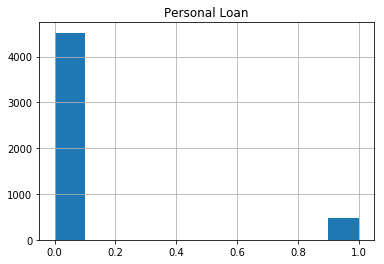

In [27]:
df.hist(column='Personal Loan')

This is a categorical variable. Only 480 (out of 5000) people accepted the offer for personal loan. this is - 9.6%

### Q. 4. Split the data into training and test set in the ratio of 70:30 respectively

In [66]:
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

X = df.drop(['Personal Loan', 'ID'], axis=1)
y = df['Personal Loan']

print (X.shape)
print (X.head())

# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.
X_z =  X.apply(zscore)  # convert all attributes to Z scale 

print (X_z.shape)
print (X_z.head())

X_z_train, X_z_test, y_train, y_test = train_test_split(X_z, y, train_size=300/395, random_state=0)

print ('X train', X_z_train.shape)
print ('X test', X_z_test.shape)
print ('y train', y_train.shape)
print ('y test', y_test.shape)

print (y.value_counts())
print (y_train.value_counts())
print (y_test.value_counts())

(5000, 12)
   Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1  
(5000, 12)
        Age  Experience    Income  ZIP Code    Family     CCAvg  Education  \
0 -1.774417   -1.666078 -0.538229 -0.964114  1.397414 -0.193385  -1.049078   
1 -0.029524   -0.096330 -0.86

C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


5. Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a liability customer buying personal loans (15 points)

### 5.a. Logistic Model to predict the likelihood of a liability customer buying personal loans 

In [67]:
from sklearn.linear_model import LogisticRegression

mylgr = LogisticRegression ()

#train with training data
clf = mylgr.fit(X_z_train, y_train)

C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
intercept = clf.intercept_
print ('intercept ', intercept)

coef = clf.coef_
print ('columns ', X_z.columns)
print ('coeff ', coef)


intercept  [-4.50047118]
columns  Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')
coeff  [[-0.41790908  0.50914875  2.34749931  0.03042865  0.74171999  0.26559481
   1.41796773  0.08362103 -0.21691531  0.83008013 -0.35087152 -0.43615999]]


In [69]:
coeff_df = pd.DataFrame(coef,columns=X.columns)
coeff_df
coeff_df_new = coeff_df.transpose()

print ('***coefficients of the model***')
print (coeff_df.transpose())

print ('maximum impact coefficient -', coeff_df_new.max())
print ('maximum impact independent variable is Income')

***coefficients of the model***
                           0
Age                -0.417909
Experience          0.509149
Income              2.347499
ZIP Code            0.030429
Family              0.741720
CCAvg               0.265595
Education           1.417968
Mortgage            0.083621
Securities Account -0.216915
CD Account          0.830080
Online             -0.350872
CreditCard         -0.436160
maximum impact coefficient - 0    2.347499
dtype: float64
maximum impact independent variable is Income


In [72]:
from sklearn.metrics import accuracy_score
#check accuracy for training data
log_score_train = accuracy_score (y_train,clf.predict(X_z_train))

#check accuracy for test data
log_score_test = accuracy_score (y_test,clf.predict(X_z_test))

print ('log_score_train - ', log_score_train)
print ('log_score_test - ', log_score_test)

log_score_train -  0.9496971293126152
log_score_test -  0.9592684954280964


### 5.b. KNN Model to predict the likelihood of a liability customer buying personal loans 


In [74]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

# Call Nearest Neighbour algorithm

NNH.fit(X_z_train, y_train)

# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

print ('train accuracy ', NNH.score(X_z_train, y_train))
print ('test accuracy ', NNH.score(X_z_test, y_test))

train accuracy  1.0
test accuracy  0.9642560266001663


In [64]:
### 5.c. Naïve Bayes Model to predict the likelihood of a liability customer buying personal loans 


In [82]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_z_train, y_train)
print(GNB)
# make predictions
expected = y_test
predicted = GNB.predict(X_z_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1098
           1       0.41      0.60      0.49       105

   micro avg       0.89      0.89      0.89      1203
   macro avg       0.69      0.76      0.71      1203
weighted avg       0.91      0.89      0.90      1203

[[1009   89]
 [  42   63]]


In [83]:
## Get the probability
df['prob'] = pd.DataFrame(GNB.predict_proba(X_z_train))[1]

In [87]:
## Model Performance Measure
## Deciling
df['decile']=pd.qcut(df.prob.rank(method='first'), 10, labels=False)

## Rank Order Table and KS Statistics
def Response_Rate(X_z,y,Target):
    
    Rank=X_z.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_prob","max_prob","avg_prob",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank=Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"]=round(Rank["cnt_resp"]*100/Rank["cnt"],2)
    Rank["cum_resp"]=np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"]=np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"]=round(Rank["cum_resp"]*100/np.sum(Rank["cnt_resp"]),2)
    Rank["cum_non_resp_pct"]=round(
            Rank["cum_non_resp"]*100/np.sum(Rank["cnt_non_resp"]),2)
    Rank["KS"] = round(Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"],2)
    Rank
    return(Rank)


RRate = Response_Rate(df,"prob","Personal Loan")
RRate

,decile,min_prob,max_prob,avg_prob,cnt,cnt_resp,cnt_non_resp,rrate,cum_resp,cum_non_resp,cum_resp_pct,cum_non_resp_pct,KS
9,9.0,8.468616e-01,1.000000,0.972069,380.0,35.0,345.0,9.21,35.0,345.0,9.21,10.10,-0.89
8,8.0,7.281076e-02,0.841659,0.379451,380.0,42.0,338.0,11.05,77.0,683.0,20.26,19.99,0.27
7,7.0,8.914671e-03,0.072056,0.028256,379.0,40.0,339.0,10.55,117.0,1022.0,30.79,29.91,0.88
6,6.0,2.189526e-03,0.008910,0.004594,380.0,37.0,343.0,9.74,154.0,1365.0,40.53,39.95,0.58
5,5.0,7.526694e-04,0.002187,0.001332,379.0,33.0,346.0,8.71,187.0,1711.0,49.21,50.07,-0.86
4,4.0,2.496383e-04,0.000751,0.000454,380.0,37.0,343.0,9.74,224.0,2054.0,58.95,60.11,-1.16
3,3.0,7.147569e-05,0.000249,0.000139,380.0,30.0,350.0,7.89,254.0,2404.0,66.84,70.35,-3.51
2,2.0,2.456326e-05,0.000071,0.000044,379.0,40.0,339.0,10.55,294.0,2743.0,77.37,80.28,-2.91
1,1.0,7.826332e-06,0.000025,0.000015,380.0,44.0,336.0,11.58,338.0,3079.0,88.95,90.11,-1.16
0,0.0,4.090631e-209,0.000008,0.000004,380.0,42.0,338.0,11.05,380.0,3417.0,100.00,100.00,0.00


In [91]:
# Compute and print AUC score
#from sklearn.metrics import roc_auc_score
#auc = roc_auc_score(df['Personal Loan'],df['prob'])
#auc

## 6. Print the confusion matrix for all the above models (5 points)

In [93]:
# Logistics Regression
# print(metrics.confusion_matrix(expected, predicted))

expected = y_test
predicted = mylgr.predict(X_z_test)
# summarize the fit of the model
print(metrics.confusion_matrix(expected, predicted))

print(metrics.classification_report(expected, predicted))

[[1088   10]
 [  39   66]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1098
           1       0.87      0.63      0.73       105

   micro avg       0.96      0.96      0.96      1203
   macro avg       0.92      0.81      0.85      1203
weighted avg       0.96      0.96      0.96      1203



In [94]:
# KNN
# print(metrics.confusion_matrix(expected, predicted))

expected = y_test
predicted = NNH.predict(X_z_test)
# summarize the fit of the model
print(metrics.confusion_matrix(expected, predicted))

print(metrics.classification_report(expected, predicted))

[[1094    4]
 [  39   66]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1098
           1       0.94      0.63      0.75       105

   micro avg       0.96      0.96      0.96      1203
   macro avg       0.95      0.81      0.87      1203
weighted avg       0.96      0.96      0.96      1203



In [96]:
# KNN
# print(metrics.confusion_matrix(expected, predicted))

expected = y_test
predicted = GNB.predict(X_z_test)
# summarize the fit of the model
print(metrics.confusion_matrix(expected, predicted))

print(metrics.classification_report(expected, predicted))

[[1009   89]
 [  42   63]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1098
           1       0.41      0.60      0.49       105

   micro avg       0.89      0.89      0.89      1203
   macro avg       0.69      0.76      0.71      1203
weighted avg       0.91      0.89      0.90      1203



### Q.7. Give your reasoning on which is the best model in this case and why it performs better? (5 points)


Based on the confusion matrix for all three models, precision for '0' is almost same in all models. Here Positive predicitability is quite important so that focus on right potential customers is provided.

Based on the values for '1', both precision and recall are better for KNN. hence we can go with KNN model. 

It is possible that, since we considered all the attributes, and if we had removed non-important attributes, another model might have given better results. 

Even test accuracy for KNN is best among all models. 
KNN for training data is not good as it is giving value of 1, this means it is an overfit model. 

However, once we consider removing some attributes, the model can become more generic. It is possible that another model (eg. logistics model) might provide better result once we do feature selection/ engineering.